- Experimenting with `get_frenet_relative_position`, defined within
`AutomotiveDrivingModels/src/2d/vehicles/scenes.jl`
- Will be required to provide vehicle states to Zach's ego vehicle
- Written using the tutorials available within AutoViz
- The roadway generation functions are defined in
`AutomotiveDrivingModels/src/2d/roadway/roadway_generation.jl`
- `roadways.jl` in the same folder defines a lot of useful function
    - build roadway from dxf
    - build the roadway

In [2]:
using AutomotiveDrivingModels
using AutoViz

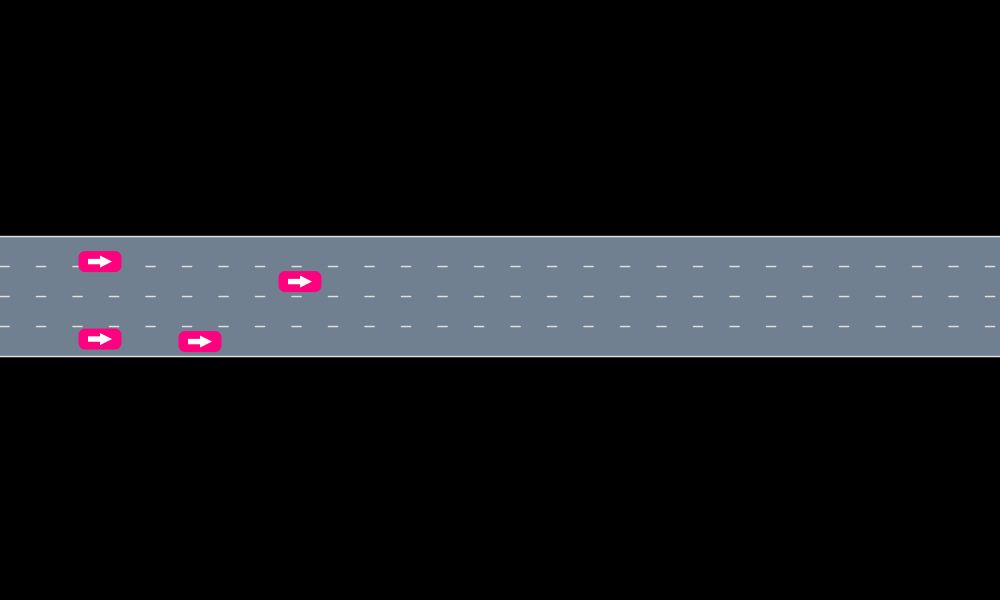

In [71]:
roadway = gen_straight_roadway(4, 100.0) # numlanes, length
scene = Scene()
state1 = VehicleState(Frenet(roadway[LaneTag(1,1)],10.0,0.25), roadway, 10.0)
veh1 = Vehicle(state1, VehicleDef(), 1)
state2 = VehicleState(Frenet(roadway[LaneTag(1,2)],20.0,-3.0), roadway, 10.0)
veh2 = Vehicle(state2, VehicleDef(), 2)
state3 = VehicleState(Frenet(roadway[LaneTag(1,3)],30.0), roadway, 10.0)
veh3 = Vehicle(state3, VehicleDef(), 3)
state4 = VehicleState(Frenet(roadway[LaneTag(1,4)],10.0,-1.0), roadway, 10.0)
veh4 = Vehicle(state4, VehicleDef(), 4)
push!(scene, veh1)
push!(scene, veh2)
push!(scene, veh3)
push!(scene,veh4)
render(scene, roadway, cam=FitToContentCamera(0.))

In [75]:
ego_veh = veh3
ego_lanenum = ego_veh.state.posF.roadind.tag.lane
ego_roadind = ego_veh.state.posF.roadind
ego_offset = ego_veh.state.posF.t
lanewidth = get_lane_width(veh3,roadway)
y_ego_veh = (ego_lanenum-1)*lanewidth + ego_offset

6.0

In [76]:
# Calculate planner_x and planner_y based on relative frenet position
veh = veh4
veh_global = veh.state.posG
relfre = get_frenet_relative_position(veh_global,ego_roadind,roadway)
#"""Positive is veh is front of ego"""
xdist = relfre.Δs

#"""Positive if veh is left of ego"""
ydist = relfre.t
@show ydist

planner_x = xdist + 50
planner_y = y_ego_veh + ydist

ydist = 2.0


8.0

In [32]:
relfre = get_frenet_relative_position(veh_global,ego_roadind,roadway)

AutomotiveDrivingModels.FrenetRelativePosition(RoadIndex({1, 0.300000}, {1, 3}), RoadIndex({1, 0.100000}, {1, 3}), -19.999999999999993, 3.8000000000000007, 0.0)

In [34]:
#"""Positive is veh is front of ego"""
xdist = relfre.Δs

#"""Positive if veh is left of ego"""
ydist = relfre.t
@show xdist,ydist

(xdist, ydist) = (-19.999999999999993, 3.8000000000000007)


(-19.999999999999993, 3.8000000000000007)

In [47]:
lanewidth = get_lane_width(veh3,roadway)

3.0

In [55]:
ego_lanenum

3

In [60]:
(ego_lanenum-1)*3

6

In [61]:
y_ego_veh = (ego_lanenum-1)*lanewidth + ego_offset

6.0

In [62]:
planner_x = xdist + 50
planner_y = y_ego_veh + ydist

9.8

# Experimentation

In [85]:
veh3 == veh3

true

In [81]:
if hypot(veh1.state.posG-veh1.state.posG)>1e-10
    @show "yo"
else
    @show "no"
end

"no" = "no"


"no"

In [77]:
fieldnames(ego_veh.state.posF)

4-element Array{Symbol,1}:
 :roadind
 :s      
 :t      
 :ϕ      

In [78]:
ego_veh.state.posF.s

30.0

In [79]:
ego_veh.state.v

10.0

In [24]:
? ArrowCar

search: ArrowCar



No documentation found.

`AutoViz.ArrowCar` is of type `UnionAll`.

**Summary:**

```
struct UnionAll <: Type{T}
```

**Fields:**

```
var  :: TypeVar
body :: Any
```


In [17]:
fieldnames(veh1.state.posF.roadind)
(veh3.state.posF.roadind.tag)

LaneTag(1, 3)

In [160]:
fieldnames(veh1.state.posF)

4-element Array{Symbol,1}:
 :roadind
 :s      
 :t      
 :ϕ      

In [161]:
methods(Frenet)

# 10 methods for generic function "(::Type)":
AutomotiveDrivingModels.Frenet(roadind::AutomotiveDrivingModels.RoadIndex, s::Float64, t::Float64, ϕ::Float64) in AutomotiveDrivingModels at /home/raunak/.julia/v0.6/AutomotiveDrivingModels/src/2d/vehicles/frenet.jl:2
AutomotiveDrivingModels.Frenet(roadind::AutomotiveDrivingModels.RoadIndex, roadway::AutomotiveDrivingModels.Roadway; t, ϕ) in AutomotiveDrivingModels at /home/raunak/.julia/v0.6/AutomotiveDrivingModels/src/2d/vehicles/frenet.jl:8
AutomotiveDrivingModels.Frenet(roadproj::AutomotiveDrivingModels.RoadProjection, roadway::AutomotiveDrivingModels.Roadway) in AutomotiveDrivingModels at /home/raunak/.julia/v0.6/AutomotiveDrivingModels/src/2d/vehicles/frenet.jl:13
AutomotiveDrivingModels.Frenet(lane::AutomotiveDrivingModels.Lane, s::Float64) in AutomotiveDrivingModels at /home/raunak/.julia/v0.6/AutomotiveDrivingModels/src/2d/vehicles/frenet.jl:20
AutomotiveDrivingModels.Frenet(lane::AutomotiveDrivingModels.Lane, s::Float64, t::Float64) in AutomotiveDrivingModels at /home/raunak/.julia/v0.6/AutomotiveDrivingModels/src/2d/vehicles/frenet.jl:20
AutomotiveDrivingModels.Frenet(lane::AutomotiveDrivingModels.Lane, s::Float64, t::Float64, ϕ::Float64) in AutomotiveDrivingModels at /home/raunak/.julia/v0.6/AutomotiveDrivingModels/src/2d/vehicles/frenet.jl:20
AutomotiveDrivingModels.Frenet(posG::Vec.VecSE2, roadway::AutomotiveDrivingModels.Roadway) in AutomotiveDrivingModels at /home/raunak/.julia/v0.6/AutomotiveDrivingModels/src/2d/vehicles/frenet.jl:23
AutomotiveDrivingModels.Frenet(posG::Vec.VecSE2, lane::AutomotiveDrivingModels.Lane, roadway::AutomotiveDrivingModels.Roadway) in AutomotiveDrivingModels at /home/raunak/.julia/v0.6/AutomotiveDrivingModels/src/2d/vehicles/frenet.jl:24
AutomotiveDrivingModels.Frenet(roadind, s, t, ϕ) in AutomotiveDrivingModels at /home/raunak/.julia/v0.6/AutomotiveDrivingModels/src/2d/vehicles/frenet.jl:2
(::Type{T})(arg) where T in Base at sysimg.jl:77

In [157]:
@show veh1.state
@show veh2.state
@show veh3.state

veh1.state = VehicleState(VecSE2({10.000, 0.000}, 0.000), Frenet(RoadIndex({1, 0.200000}, {1, 1}), 10.000, 0.000, 0.000), 10.000)
veh2.state = VehicleState(VecSE2({20.000, 3.000}, 0.000), Frenet(RoadIndex({1, 0.400000}, {1, 2}), 20.000, 0.000, 0.000), 10.000)
veh3.state = VehicleState(VecSE2({30.000, 6.000}, 0.000), Frenet(RoadIndex({1, 0.600000}, {1, 3}), 30.000, 0.000, 0.000), 10.000)


VehicleState(VecSE2({30.000, 6.000}, 0.000), Frenet(RoadIndex({1, 0.600000}, {1, 3}), 30.000, 0.000, 0.000), 10.000)

In [148]:
fre = get_frenet_relative_position(
    veh3.state.posG,veh1.state.posF.roadind,roadway)

AutomotiveDrivingModels.FrenetRelativePosition(RoadIndex({1, 0.200000}, {1, 1}), RoadIndex({1, 0.600000}, {1, 1}), 20.000000000000007, 6.0, 0.0)

In [149]:
@show fieldnames(fre)
@show fre.Δs
fre.t

fieldnames(fre) = Symbol[:origin, :target, :Δs, :t, :ϕ]
fre.Δs = 20.000000000000007


6.0

In [140]:
fre.Δs

207.3832687456586

# Stadium Roadway

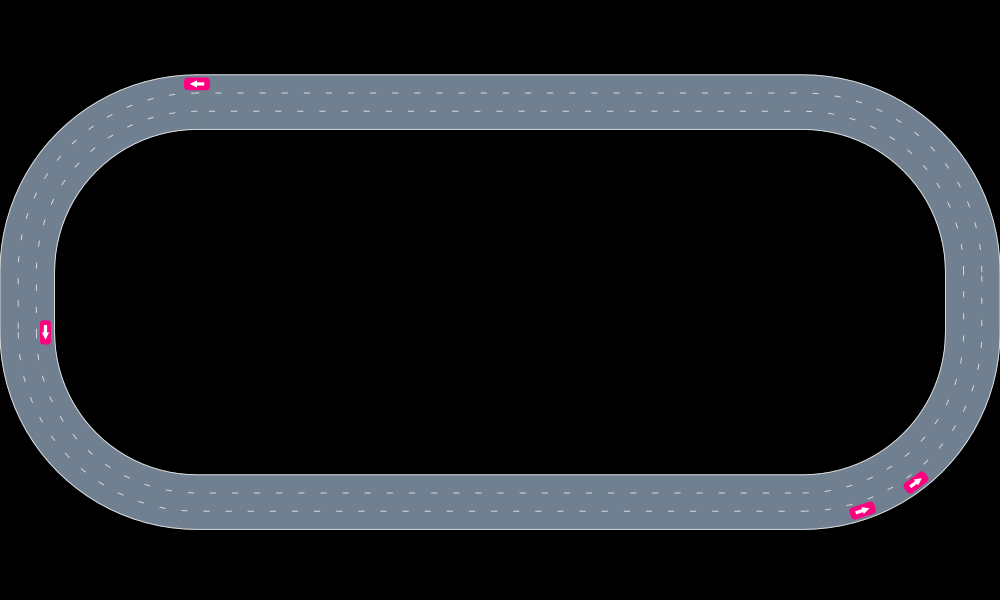

In [200]:
roadway = gen_stadium_roadway(3)
scene = Scene()
state1 = VehicleState(Frenet(roadway[LaneTag(1,1)],10.0), roadway, 10.0)
veh1 = Vehicle(state1, VehicleDef(), 1)
state2 = VehicleState(Frenet(roadway[LaneTag(1,1)],20.0), roadway, 10.0)
veh2 = Vehicle(state2, VehicleDef(), 2)
state3 = VehicleState(Frenet(roadway[LaneTag(3,1)],0.0), roadway, 10.0)
veh3 = Vehicle(state3, VehicleDef(), 3)
state4 = VehicleState(Frenet(roadway[LaneTag(4,3)],0.0), roadway, 10.0)
veh4 = Vehicle(state4, VehicleDef(), 3)
push!(scene, veh1)
push!(scene, veh2)
push!(scene, veh3)
push!(scene, veh4)
render(scene, roadway, cam=FitToContentCamera(0.))

In [201]:
fre = get_frenet_relative_position(
    veh2.state.posG,veh1.state.posF.roadind,roadway)

AutomotiveDrivingModels.FrenetRelativePosition(RoadIndex({5, 0.928669}, {1, 1}), RoadIndex({10, 0.857338}, {1, 1}), 9.999999999999996, 5.322427758919252e-16, 0.0)

In [193]:
(roadway.segments[1].lanes)

3-element Array{AutomotiveDrivingModels.Lane,1}:
 AutomotiveDrivingModels.Lane(LaneTag(1, 1), AutomotiveDrivingModels.CurvePt[CurvePt({100.000, -6.000, 0.000}, 0.000, NaN, NaN), CurvePt({102.027, -5.934, 0.065}, 2.029, NaN, NaN), CurvePt({104.046, -5.735, 0.131}, 4.058, NaN, NaN), CurvePt({106.048, -5.404, 0.196}, 6.087, NaN, NaN), CurvePt({108.023, -4.944, 0.262}, 8.116, NaN, NaN), CurvePt({109.965, -4.355, 0.327}, 10.145, NaN, NaN), CurvePt({111.863, -3.640, 0.393}, 12.174, NaN, NaN), CurvePt({113.711, -2.803, 0.458}, 14.203, NaN, NaN), CurvePt({115.500, -1.847, 0.524}, 16.232, NaN, NaN), CurvePt({117.223, -0.776, 0.589}, 18.261, NaN, NaN)  …  CurvePt({125.776, 7.777, 0.982}, 30.434, NaN, NaN), CurvePt({126.847, 9.500, 1.047}, 32.463, NaN, NaN), CurvePt({127.803, 11.289, 1.113}, 34.492, NaN, NaN), CurvePt({128.640, 13.137, 1.178}, 36.521, NaN, NaN), CurvePt({129.355, 15.035, 1.244}, 38.550, NaN, NaN), CurvePt({129.944, 16.977, 1.309}, 40.579, NaN, NaN), CurvePt({130.404, 18.952, 1.37

In [194]:
lane = roadway[LaneTag(4,1)]
lane.curve[end]

CurvePt({-0.000, -6.000, 6.283}, 48.695, NaN, NaN)

In [133]:
fieldnames(
    state1.posF.roadind)
#(state1.posF.roadind.tag.segment)

2-element Array{Symbol,1}:
 :ind
 :tag

In [131]:
if veh1.state.posF.roadind.tag.segment == veh2.state.posF.roadind.tag.segment
    @show "yo"
else
    @show "yomahesh"
end

"yomahesh" = "yomahesh"


"yomahesh"

## Detective on roadway elements
- Trying to find where the length of a segment is stored
- Inspired by: why is there a gap between new end of segment 1 and start of segment 2

In [102]:
fieldnames(roadway.segments[1])
length(roadway.segments)

4

In [111]:
typeof(roadway.segments[1])
fieldnames(roadway.segments[1])

2-element Array{Symbol,1}:
 :id   
 :lanes

In [119]:
@show typeof(roadway.segments[1].lanes[1])
fieldnames(roadway.segments[1].lanes[1])

typeof(roadway.segments[1].lanes[1]) = AutomotiveDrivingModels.Lane


8-element Array{Symbol,1}:
 :tag           
 :curve         
 :width         
 :speed_limit   
 :boundary_left 
 :boundary_right
 :exits         
 :entrances     

In [116]:
typeof(roadway.segments[1].lanes[1].tag)
fieldnames(roadway.segments[1].lanes[1].tag)

2-element Array{Symbol,1}:
 :segment
 :lane   

In [117]:
typeof(roadway.segments[1].lanes[1].tag.lane)

Int64

In [121]:
@show typeof(roadway.segments[1].lanes[1].curve)
fieldnames(roadway.segments[1].lanes[1].curve[1])

typeof(roadway.segments[1].lanes[1].curve) = Array{AutomotiveDrivingModels.CurvePt,1}


4-element Array{Symbol,1}:
 :pos
 :s  
 :k  
 :kd 

In [122]:
@show (roadway.segments[1].lanes[1].curve[1].s)

roadway.segments[1].lanes[1].curve[1].s = 0.0


0.0

In [ ]:
get_frenet_relative_position(veh2.state.posG,veh1.state.posF.roadind,roadway)

In [123]:
# Pretty useless thing called names that gives all the available
# names with the module AutomotiveDrivingModels
names(AutomotiveDrivingModels)

533-element Array{Symbol,1}:
 :AABB                     
 :AABB_center_length_width 
 :ACC                      
 :ACCFS                    
 :ACCFT                    
 :ANGULARRATEF             
 :ANGULARRATEG             
 :A_REQ_STAYINLANE         
 :AbstractCoordinate       
 :AbstractFeature          
 :AbstractFeatureExtractor 
 :AbstractMixtureModel     
 :AbstractMvNormal         
 ⋮                         
 :symbol2feature           
 :test_distr               
 :test_samples             
 :tick!                    
 :to_oriented_bounding_box!
 :track_lane!              
 :track_longitudinal!      
 :update!                  
 :var                      
 :varlogx                  
 :wsample                  
 :wsample!                 

# Overlays

In [169]:
struct LaneOverlay <: SceneOverlay
    lane::Lane
    color::Colorant
end

function AutoViz.render!(rendermodel::RenderModel, overlay::LaneOverlay, scene::Scene, roadway::Roadway)
    render!(rendermodel, overlay.lane, roadway, color_asphalt=overlay.color) # this display a lane with the specified color
    return rendermodel
end

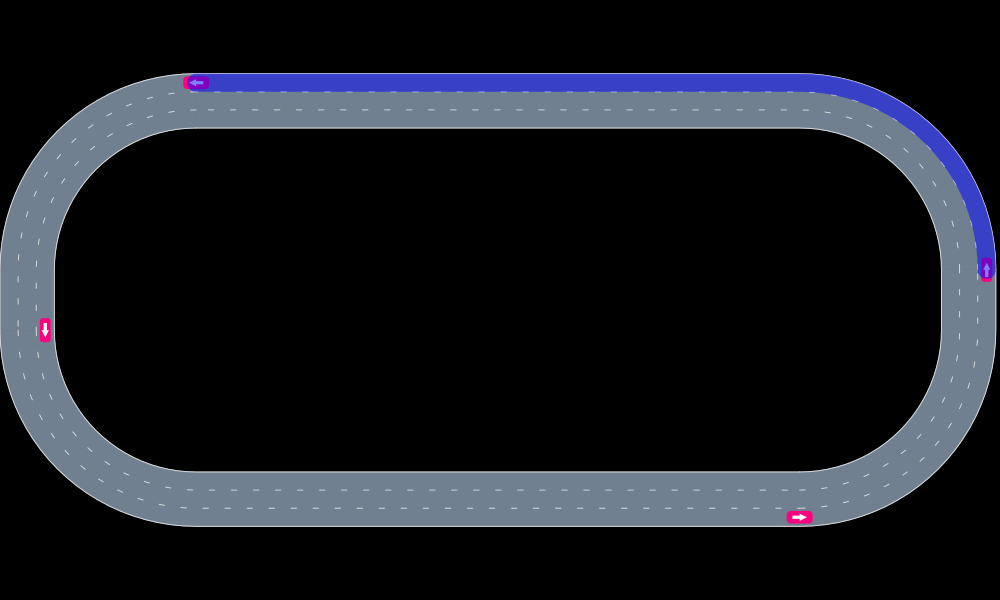

In [171]:
lane_overlay = LaneOverlay(roadway[LaneTag(2,1)], RGBA(0.0,0.0,1.0,0.5))
render(scene, roadway, [lane_overlay], cam=FitToContentCamera(0.))